<a href="https://colab.research.google.com/github/SMayienda/sarah_m/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

Please fill out:
* Student name:
* Student pace: self paced / part time / full time
* Scheduled project review date/time:
* Instructor name:
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
# loading the libraries that we will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset from the csv file

In [9]:
# assign the dataframe to movie_gross
movie_gross = pd.read_csv('/content/bom.movie_gross.csv.gz')
# assign the dataframe to title_basics
title_basics = pd.read_csv('/content/imdb.title.basics.csv.gz')


Getting the size of the datasets

In [11]:
movie_gross.shape

(3387, 5)

In [12]:
title_basics.shape

(146144, 6)

Getting the first rows of the datasets

In [21]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [22]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Accessing information about our dataset

In [16]:
print(movie_gross.info(), '\n')
print(title_basics.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), in

Completeness

In [25]:
# Checking for null values
movie_gross.isnull().sum(), title_basics.isnull().sum()

(title                0
 studio               5
 domestic_gross      28
 foreign_gross     1350
 year                 0
 dtype: int64,
 tconst                 0
 primary_title          1
 original_title        22
 start_year             0
 runtime_minutes    31739
 genres              5408
 dtype: int64)

Accuracy

In [26]:
# Checking for duplicates
movie_gross.duplicated().sum(), title_basics.duplicated().sum()

(0, 0)

Least popular movies

In [31]:
sorted_df = movie_gross.sort_values(by='domestic_gross', ascending=False)
sorted_df.head(10)


,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016


In [32]:
sorted_df=title_basics.sort_values(by='start_year', ascending=False)
sorted_df.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
89506,tt5174640,100 Years,100 Years,2115,NaN,Drama
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy"
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy"
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,NaN,"Adventure,Family,Fantasy"
2948,tt10300396,Untitled Star Wars Film,Untitled Star Wars Film,2024,NaN,NaN
2483,tt10255736,Untitled Marvel Project,Untitled Marvel Project,2023,NaN,Action
16337,tt1757678,Avatar 3,Avatar 3,2023,NaN,"Action,Adventure,Drama"
2906,tt10298848,Untitled Disney Live-Action Project,Untitled Disney Live-Action Project,2023,NaN,NaN
106865,tt6258542,Wraith of the Umbra and Eidolon II,Wraith of the Umbra and Eidolon II,2023,NaN,"Adventure,Drama,Fantasy"


descriptive statistics

In [34]:
movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [35]:
title_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [41]:
# most popular movies greater than 90
movie_gross[movie_gross['domestic_gross'] > 90]

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [40]:
title_basics[title_basics['start_year'] > 2000]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


Bar graph

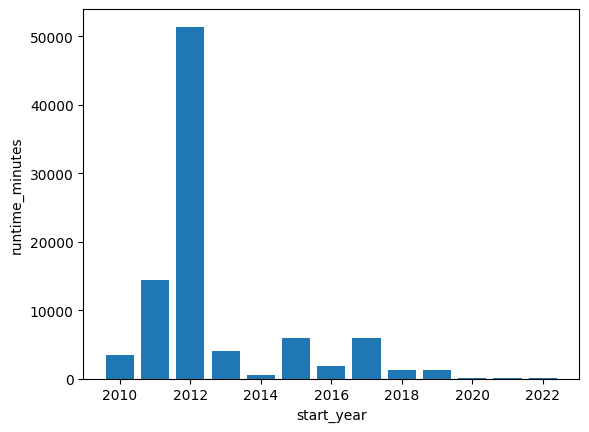

In [53]:
import matplotlib.pyplot as plt
x= title_basics['start_year']
y= title_basics['runtime_minutes']
plt.xlabel('start_year')
plt.ylabel('runtime_minutes')
plt.bar(x,y);